In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [45]:
car_df = pd.read_csv('/content/drive/MyDrive/PR/CAR DETAILS FROM CAR DEKHO.csv')
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [46]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [47]:
car_df.shape

(4340, 8)

In [48]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [49]:
car_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


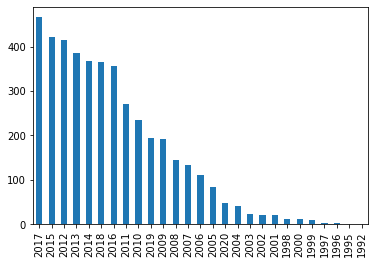

In [50]:
car_df.year.value_counts().plot(kind='bar')

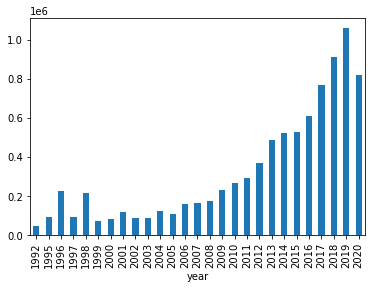

In [51]:
car_df.groupby('year')['selling_price'].mean().plot(kind='bar')

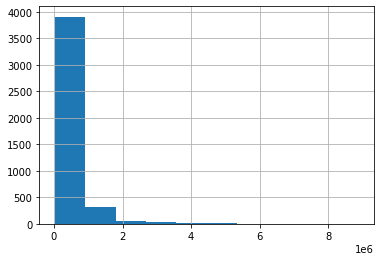

In [52]:
car_df.selling_price.hist()

-0.19228863054511436


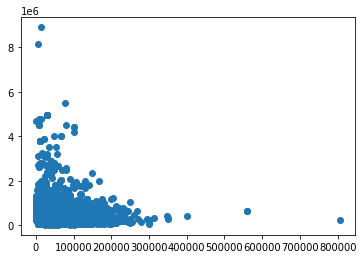

In [53]:
print(car_df.km_driven.corr(car_df.selling_price))
plt.scatter(x='km_driven',y='selling_price',data=car_df)

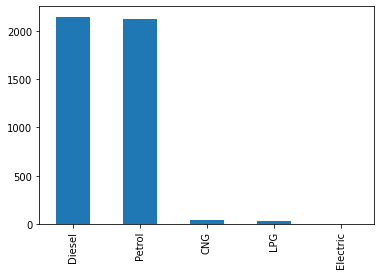

In [54]:
car_df.fuel.value_counts().plot(kind='bar')

In [55]:
car_df.drop(["owner"],axis=1,inplace=True)

In [56]:
for feature in car_df.columns:
    le = LabelEncoder()
    le.fit(car_df[feature])
    car_df[feature] = le.transform(car_df[feature])
X = car_df.drop(['selling_price'],axis=1)
Y = car_df['selling_price']


In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,random_state=42)

In [58]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train,y_train)


SVC()

In [59]:
clf.score(x_test,y_test)

0.034101382488479264

In [60]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [61]:
gnb.score(x_test,y_test)

0.03225806451612903